In [1]:
%load_ext autoreload
%autoreload 2
from pytree import *
from test import *
import random
import matplotlib.pyplot as plt
print(__version__)

0.0.2


In [2]:
random.seed(27)
all_datasets = [generate_dataset(intercept=i, coeff=i, size=50, min_x=(i-1)*10, max_x=i*10, cls=float) for i in range(1, 9)]
dataset = sum(all_datasets, [])

# A first regression

This shows the non-optimality of the greedy algorithm: the top node is not a real breakpoint.

In [13]:
reg = compute_regression(dataset)
print(len(reg.breakpoints))
reg

8


x ≤ 3.832e+01?
    └──x ≤ 2.996e+01?
    │    └──x ≤ 1.907e+01?
    │    │    └──x ≤ 9.973e+00?
    │    │    │    └──y ~ 1.000e+00x + 1.000e+00
    │    │    │    └──y ~ 2.000e+00x + 2.000e+00
    │    │    └──y ~ 3.000e+00x + 3.000e+00
    │    └──y ~ 4.000e+00x + 4.000e+00
    └──x ≤ 6.987e+01?
         └──x ≤ 5.985e+01?
         │    └──x ≤ 4.966e+01?
         │    │    └──x ≤ 3.992e+01?
         │    │    │    └──y ~ 4.000e+00x + 4.000e+00
         │    │    │    └──y ~ 5.000e+00x + 5.000e+00
         │    │    └──y ~ 6.000e+00x + 6.000e+00
         │    └──y ~ 7.000e+00x + 7.000e+00
         └──y ~ 8.000e+00x + 8.000e+00

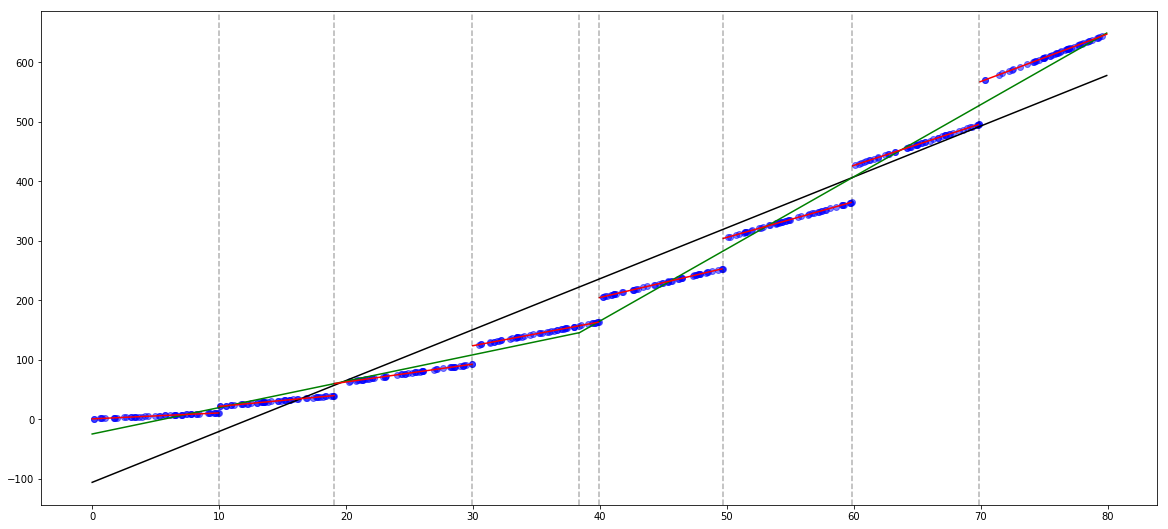

In [4]:
reg.plot_dataset()

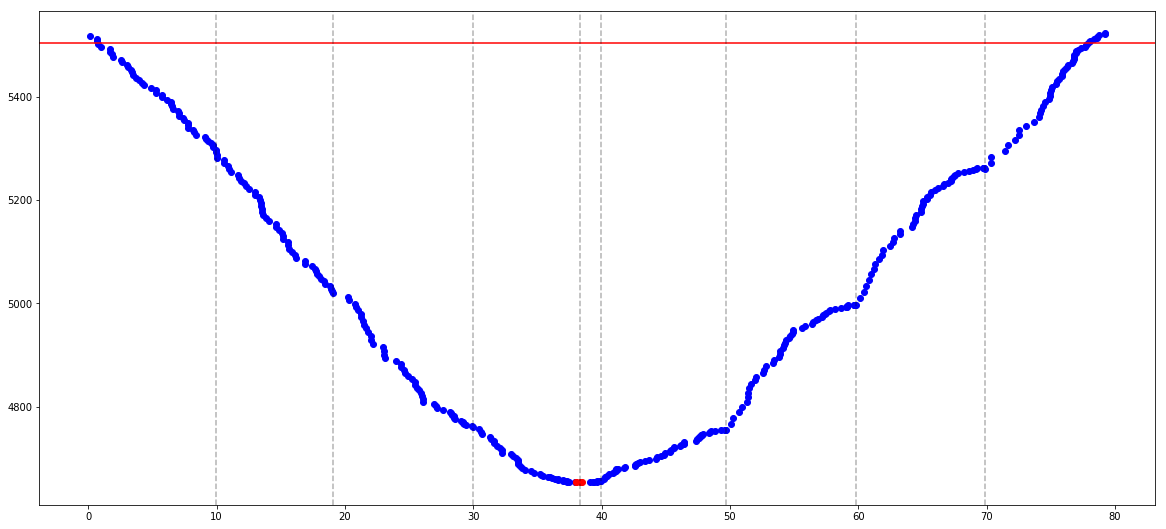

In [5]:
reg.plot_error()

In [6]:
flat = reg.flatify()
flat

-inf < x ≤ 9.973e+00
	y ~ 1.000e+00x + 1.000e+00
9.973e+00 < x ≤ 1.907e+01
	y ~ 2.000e+00x + 2.000e+00
1.907e+01 < x ≤ 2.996e+01
	y ~ 3.000e+00x + 3.000e+00
2.996e+01 < x ≤ 3.832e+01
	y ~ 4.000e+00x + 4.000e+00
3.832e+01 < x ≤ 3.992e+01
	y ~ 4.000e+00x + 4.000e+00
3.992e+01 < x ≤ 4.966e+01
	y ~ 5.000e+00x + 5.000e+00
4.966e+01 < x ≤ 5.985e+01
	y ~ 6.000e+00x + 6.000e+00
5.985e+01 < x ≤ 6.987e+01
	y ~ 7.000e+00x + 7.000e+00
6.987e+01 < x ≤ inf
	y ~ 8.000e+00x + 8.000e+00

# Simplification

We can merge consecutive segments, starting by the merges that increase the less the RSS.

In [8]:
simple_df = flat.simplify()
simple_df

,AIC,BIC,RSS,nb_breakpoints,regression
0,-297706.028769,-297566.327509,-5.877610e-09,8,"((0.12103541530799289, 1.1210354153079929), (0..."
1,-297714.028769,-297590.293368,-5.644779e-09,7,"((0.12103541530799289, 1.1210354153079929), (0..."
2,2851.482267,2959.251810,1.089752e+03,6,"((0.12103541530799289, 1.1210354153079929), (0..."
3,3561.908183,3653.711868,6.566725e+03,5,"((0.12103541530799289, 1.1210354153079929), (0..."
4,3961.401943,4037.239769,1.818777e+04,4,"((0.12103541530799289, 1.1210354153079929), (0..."
5,4208.536914,4268.408883,3.441825e+04,3,"((0.12103541530799289, 1.1210354153079929), (0..."
6,4428.103680,4472.009790,6.079478e+04,2,"((0.12103541530799289, 1.1210354153079929), (0..."
7,4733.139275,4761.079527,1.329659e+05,1,"((0.12103541530799289, 1.1210354153079929), (0..."
8,5491.749230,5503.723624,9.038088e+05,0,"((0.12103541530799289, 1.1210354153079929), (0..."


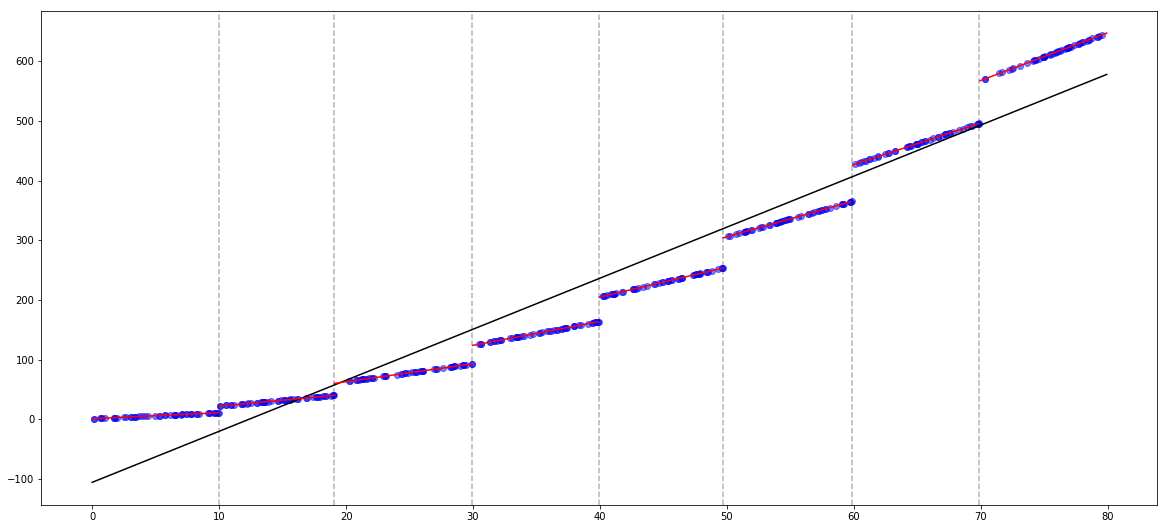

In [9]:
simple_df.regression[1].plot_dataset()

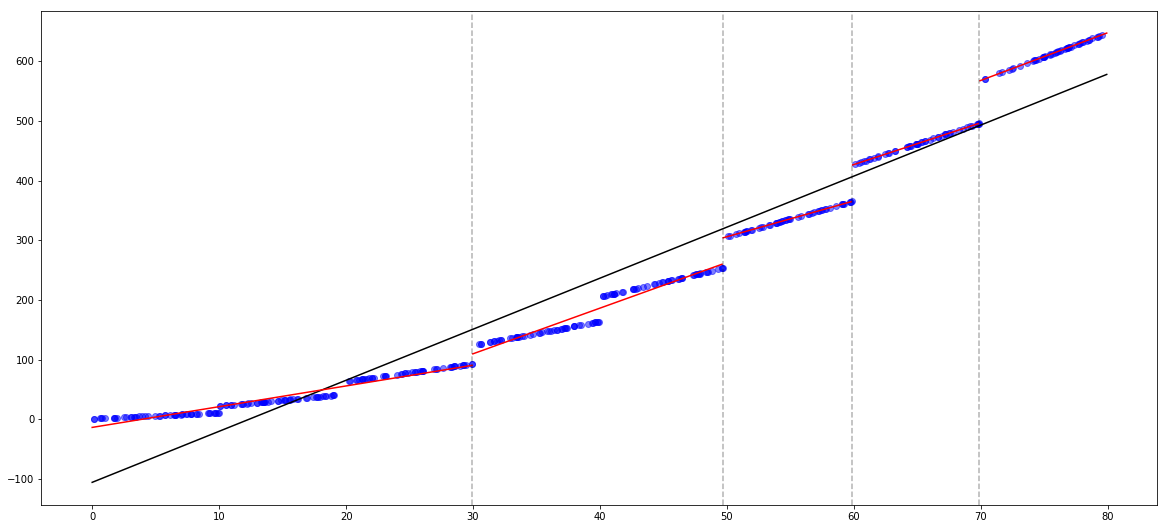

In [10]:
simple_df.regression[4].plot_dataset()

# Simplification and automatic selection

We can also simplify and automatically chose the regression with the lowest error (BIC or AIC).

In [11]:
auto_simple = reg.auto_simplify()
auto_simple

-inf < x ≤ 9.973e+00
	y ~ 1.000e+00x + 1.000e+00
9.973e+00 < x ≤ 1.907e+01
	y ~ 2.000e+00x + 2.000e+00
1.907e+01 < x ≤ 2.996e+01
	y ~ 3.000e+00x + 3.000e+00
2.996e+01 < x ≤ 3.992e+01
	y ~ 4.000e+00x + 4.000e+00
3.992e+01 < x ≤ 4.966e+01
	y ~ 5.000e+00x + 5.000e+00
4.966e+01 < x ≤ 5.985e+01
	y ~ 6.000e+00x + 6.000e+00
5.985e+01 < x ≤ 6.987e+01
	y ~ 7.000e+00x + 7.000e+00
6.987e+01 < x ≤ inf
	y ~ 8.000e+00x + 8.000e+00

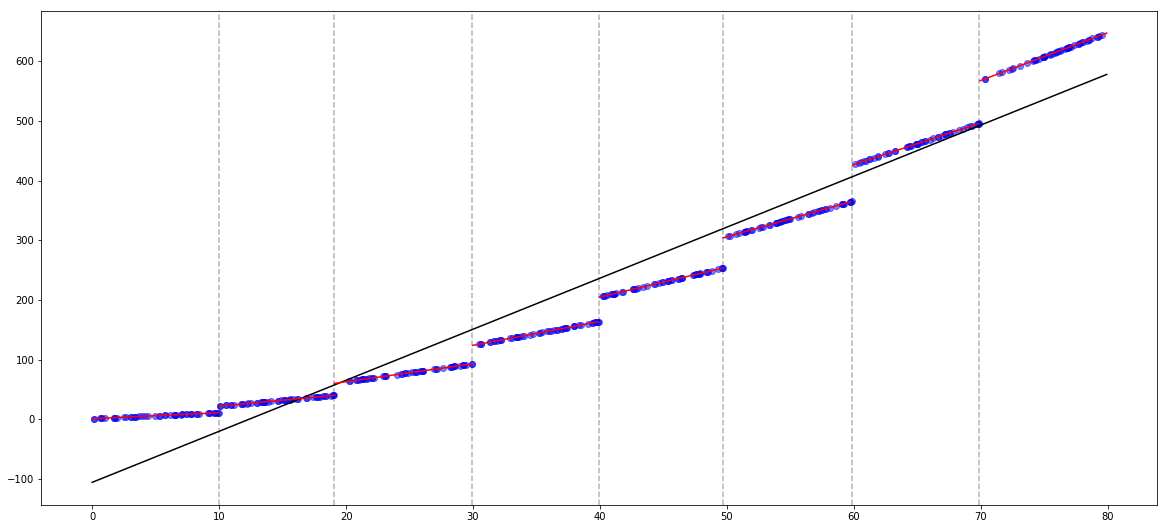

In [12]:
auto_simple.plot_dataset()